1. get IMDB data

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = \
    imdb.load_data(num_words=10000)
print('train_data sample:', train_data[0])
print('train_labels sample:', train_labels[0])
print('max index:', max([max(sequence) for sequence in train_data]))

17464789/17464789 [==============================] - 1s 0us/step
train_data sample: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15,

In [4]:
print(len(train_data[0]))

218


2. map into word list

In [2]:
word_index = imdb.get_word_index() #get dict(index, word)
reverse_word_index = dict([
    (value, key) for (key, value) in word_index.items() #reverse
])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
) #i-3 because 0、1、2-->“padding”、“start of sequence”、“unknown”
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

3. one-hot coding the data

In [5]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, item in enumerate(sequences): #sequence dim(1, N)
        results[i, item] = 1.0
    return results


In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print('x_train sample:', x_train[0])
print('x_train shape:', x_train.shape)
print('y_train sample:', y_train[0])

x_train sample: [0. 1. 1. ... 0. 0. 0.]
x_train shape: (25000, 10000)
y_train sample: 1.0


3. model define and complie

In [9]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
from keras import optimizers, losses, metrics
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

4. validate method

In [16]:
# hold 5000 for val dataset
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

#train 
history = model.fit(partial_x_train, partial_y_train, epochs=20, 
    batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history
print(history_dict.keys())

Epoch 1/20
40/40 [==============================] - 2s 46ms/step - loss: 0.0132 - accuracy: 0.9972 - val_loss: 0.7584 - val_accuracy: 0.8670
Epoch 2/20
40/40 [==============================] - 1s 31ms/step - loss: 0.0051 - accuracy: 0.9997 - val_loss: 0.7954 - val_accuracy: 0.8656
Epoch 3/20
40/40 [==============================] - 1s 30ms/step - loss: 0.0049 - accuracy: 0.9993 - val_loss: 0.8356 - val_accuracy: 0.8642
Epoch 4/20
40/40 [==============================] - 1s 31ms/step - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.8702 - val_accuracy: 0.8652
Epoch 5/20
40/40 [==============================] - 1s 31ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.9116 - val_accuracy: 0.8610
Epoch 6/20
40/40 [==============================] - 1s 30ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.9355 - val_accuracy: 0.8626
Epoch 7/20
40/40 [==============================] - 1s 30ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.9703 - val_accuracy: 0.8622
Epoch 8/20
40

5. visual the train and val loss and accuracy

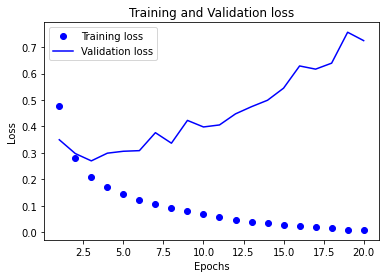

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

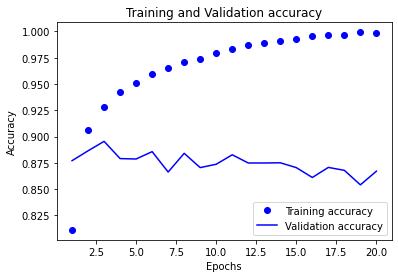

In [13]:
plt.clf() #清空图像
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

6. overfit--> minimize the epoches

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
    metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print('results:', results)
print('model prediction:', model.predict(x_test)) 

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4561 - accuracy: 0.8202
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2582 - accuracy: 0.9116
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1959 - accuracy: 0.9310
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3018 - accuracy: 0.8811
results: [0.301756888628006, 0.8811200261116028]
782/782 [==============================] - 2s 2ms/step
model prediction: [[0.21938926]
 [0.9994142 ]
 [0.86089414]
 ...
 [0.1464543 ]
 [0.0803922 ]
 [0.6885809 ]]
